# Sinusoidal model
In a first step the different blood flow models are tested with the given sinusoidal tissue architecture. The blood flow model is either 
* constant flow, i.e. identical flow in all areas of the sinusoid
* pressure dependent capillary model, i.e. different regional flow with flow component orthogonal to sinusoid direction

In [1]:
%matplotlib inline
from __future__ import print_function, division
import tellurium as te
from matplotlib import pyplot as plt
import clearance

import os
from multiscale.simulate import roadrunner_tools as rt
from multiscale.examples.models.galactose import galactose

Time<__init__> SBML compile: 33.4927670956 [s]
Time<simulate> : 1.50994300842 [s]


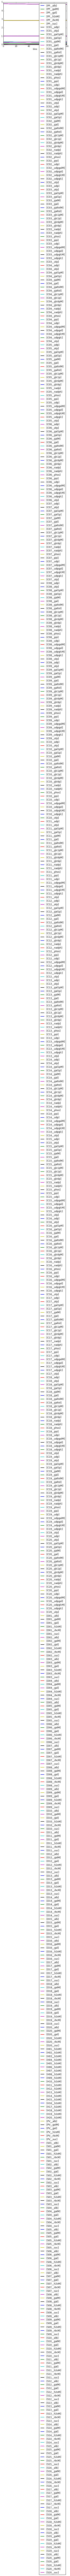

In [2]:
# flow model
# sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_flow_Nc5_v3.xml')
# sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_flow_Nc20_v3.xml')
# sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_flow_Nc100_v3.xml')

# pressure model
sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_pressure_Nc5_v4.xml')
sbml_path = os.path.join(galactose.target_dir, 'Galactose_v128_Nc20_core.xml')
# sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_pressure_Nc5_v3-diffusion.xml')
# sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_pressure_Nc5_v3-xflow.xml')
# sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_pressure_Nc5_v3-only-xflow.xml')
# sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_pressure_Nc5_v3-xflow2.xml')
# sbml_path = os.path.join(clearance.target_dir, 'sinusoidal_pressure_Nc20_v3.xml')

r = rt.MyRunner(sbml_path)
r.integrator.absolute_tolerance = 1E-20
r.integrator.variable_step_size = True
# make selections
r.select_concentrations()
# simple simulation
r.resetToOrigin()
s = r.simulate(0,100)
r.plot(s);

In [3]:
plt.plot(s['time'], s['[PP__S]'], color='blue', label='[PP__S]')
plt.plot(s['time'], s['[PV__S]'], color='black', label='[PV__S]')
for k in range(int(r.Nc)):
    label = '[S{:02}__S]'.format(k+1)
    plt.plot(s['time'], s[label], color='gray', label=label)
plt.legend()
plt.ylim([0,5])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1 VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Velocity of transportation
How fast is a change in concentration transported from periportal to perivenous.

Time<simulate> : 6.50512290001 [s]


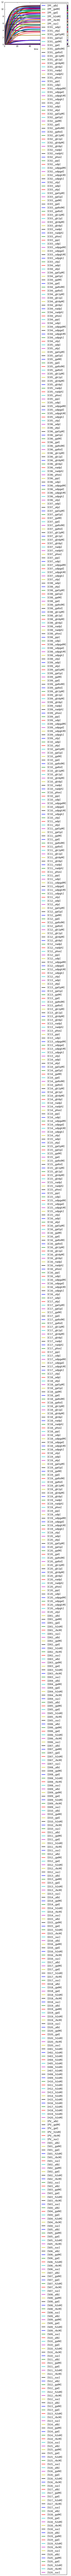

In [5]:
# perform periportal change
r.resetToOrigin()
r['[PP__gal]'] = 5

s = r.simulate(0,100)
r.plot(s);

In [6]:
import numpy as np
from multiscale.analysis import id_tools
reload(id_tools)
resolver = id_tools.IdResolver(selections=r.timeCourseSelections, Nc=r['Nc'])

species_id = 'gal'

sin_ids = resolver.sinusoidal_ids(species_id)
disse_ids = resolver.disse_ids(species_id)
pp_id = resolver.pp_id(species_id)
pv_id = resolver.pv_id(species_id)

print(resolver.find_indices(sin_ids))
print(resolver.find_indices(disse_ids))
print(resolver.find_indices([pp_id] + sin_ids + [pv_id]))
print(r.timeCourseSelections)

[595, 601, 607, 613, 619, 625, 631, 637, 643, 649, 655, 661, 667, 673, 679, 685, 691, 697, 703, 709]
[449, 455, 461, 467, 473, 479, 485, 491, 497, 503, 509, 515, 521, 527, 533, 539, 545, 551, 557, 563]
[3, 595, 601, 607, 613, 619, 625, 631, 637, 643, 649, 655, 661, 667, 673, 679, 685, 691, 697, 703, 709, 589]
['time', '[PP__alb]', '[PP__galM]', '[PP__gal]', '[PP__h2oM]', '[PP__rbcM]', '[PP__suc]', '[C01__adp]', '[C01__atp]', '[C01__gal1pM]', '[C01__gal1p]', '[C01__galM]', '[C01__gal]', '[C01__galtolM]', '[C01__galtol]', '[C01__glc1pM]', '[C01__glc1p]', '[C01__glc6pM]', '[C01__glc6p]', '[C01__nadp]', '[C01__nadph]', '[C01__phos]', '[C01__ppi]', '[C01__udp]', '[C01__udpgalM]', '[C01__udpgal]', '[C01__udpglcM]', '[C01__udpglc]', '[C01__utp]', '[C02__adp]', '[C02__atp]', '[C02__gal1pM]', '[C02__gal1p]', '[C02__galM]', '[C02__gal]', '[C02__galtolM]', '[C02__galtol]', '[C02__glc1pM]', '[C02__glc1p]', '[C02__glc6pM]', '[C02__glc6p]', '[C02__nadp]', '[C02__nadph]', '[C02__phos]', '[C02__ppi]',

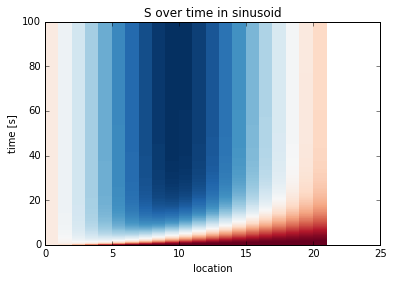

In [7]:
ids = [pp_id] + sin_ids + [pv_id]
indices = resolver.find_indices(ids)
s[:, indices]

plt.pcolor(range(0, int(r['Nc']+2)),s['time'], s[:, indices], cmap='RdBu')
plt.xlabel('location')
plt.ylabel('time [s]')
plt.title('S over time in sinusoid');

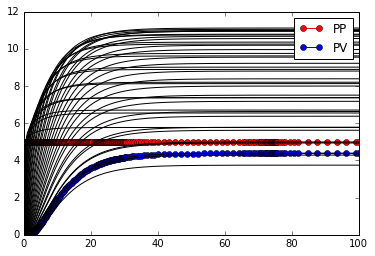

In [8]:
plt.plot(s['time'], s[pp_id], '-o', color='red', label='PP')
plt.plot(s['time'], s[pv_id], '-o', color='blue', label='PV')
plt.plot(s['time'], s[:, resolver.find_indices(sin_ids)], '-', color='black')
plt.plot(s['time'], s[:, resolver.find_indices(disse_ids)], '-', color='black')
plt.legend();

## Product formation
In the current state there is no metababolic model included.
For the transformation to P metabolic clearance is required within the cells.

In [ ]:
sin_ids_P = resolver.sinusoidal_ids('P')
disse_ids_P = resolver.disse_ids('P')
pp_id_P = resolver.pp_id('P')
pv_id_P = resolver.pv_id('P')
print(sin_ids_P)
print(disse_ids_P)
print(pp_id_P)
print(pv_id_P)


plt.plot(s['time'], s[pp_id_P], '-o', color='red', label='PP')
plt.plot(s['time'], s[pv_id_P], '-o', color='blue', label='PV')
plt.plot(s['time'], s[:, resolver.find_indices(sin_ids_P)], '-', color='black', label='sin')
plt.plot(s['time'], s[:, resolver.find_indices(disse_ids_P)], '-', color='black', label='disse')
plt.legend();

## Flow and pressure 
Plot the flow and pressure distribution within the sinuosoid.

In [9]:
# Get the gradient data in the sinusoid
reload(id_tools)
reload(rt)
gp = r.df_global_parameters()
df_P = id_tools.get_P(gp)
df_Q = id_tools.get_Q(gp)
df_q = id_tools.get_q(gp)

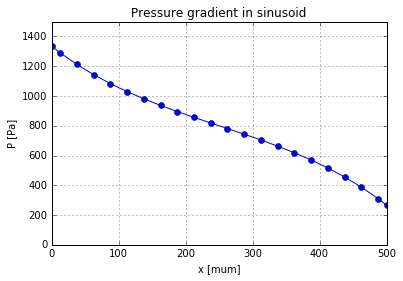

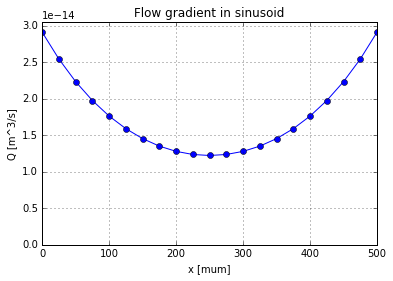

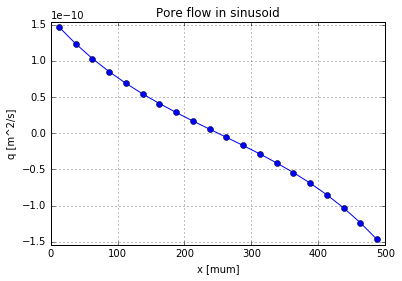

In [10]:
# pressure P
plt.plot(df_P.x*1E6, df_P.P, '-o')
plt.title('Pressure gradient in sinusoid')
plt.xlabel('x [mum]')
plt.ylabel('P [Pa]')
plt.ylim([0, 1500])
plt.grid(True)
plt.show()

# capillary flow Q
plt.plot(df_Q.x*1E6, df_Q.Q, '-o')
plt.title('Flow gradient in sinusoid')
plt.xlabel('x [mum]')
plt.ylabel('Q [m^3/s]')
plt.ylim([0, 1.05*max(df_Q.Q)])
plt.grid(True)
plt.show()

# pore flow q
plt.plot(df_q.x*1E6, df_q.q, '-o')
plt.title('Pore flow in sinusoid')
plt.xlabel('x [mum]')
plt.ylabel('q [m^2/s]')
plt.ylim(1.05*np.array([min(df_q.q), max(df_q.q)]))
plt.grid(True)
plt.show()

In [ ]:
gp.loc['PP_P',:]
gp.loc['PP_Q',:]
print(gp.loc['S01_q',:])

print(df_q)
